### O pulso ainda pulsa? Como regimes de vazões (**nacionais**?) têm sido modificados

Anotações para elaboração do artigo SBRH;

Clebson

In [4]:
import pandas as pd
import numpy as np
import plotly as py

from files.ons import Ons
from files.ana import Ana
from series.flow import Flow
from series.chuva import Chuva

In [6]:
#Local dos arquivos
file = "/home/clebsonpy/Documents/Projetos/HydroComp/Medicoes/Manso/"

#Leitura do arquivo de vazões observadas
dados_vazao_obs = Flow(path=file, source='ANA', consistence=2)
#Leitura do arquivo de vazões naturais
dados_vazao_nat = Flow(path=file, source="ONS", station = "MANSO", delete_null=True)

RecursionError: maximum recursion depth exceeded while calling a Python object

In [6]:
#Coloca os dados observados e naturais em um único DataFrame:
dados = pd.DataFrame()
dados = dados.combine_first(dados_vazao_obs.data)
dados = dados.combine_first(dados_vazao_nat.data)
#Transforma o objeto DataFrame em um objeto séries Flow
dados = Flow(dados)
data, fig = dados.plot_hydrogram()
fig_gantt = dados.gantt()
py.offline.plot(fig_gantt, filename='gráficos/gantt.html')
py.offline.plot(fig, filename='gráficos/hidro_manso.html')

'file:///home/clebsonpy/Documents/Projetos/HydroComp/gráficos/hidro_manso.html'

![](../gráficos/hidro_manso.png)
![](../gráficos/gantt.png)

In [2]:
dados_sub1 = Flow(pd.Series(dados.data.MANSO - dados.data['66231000'], name="Nat-Obs"))
dados_sub2 = Flow(pd.Series(dados.data.MANSO - dados.data['66210000'], name="Nat-Obs"))
dados_sub3 = Flow(pd.Series(dados.data['66231000'] - dados.data['66210000'], name="Nat-Obs"))

data1, fig1 = dados_sub1.plot_hydrogram()
data2, fig2 = dados_sub2.plot_hydrogram()
data3, fig3 = dados_sub3.plot_hydrogram()
py.offline.plot(fig1, filename='gráficos/manso_dif_1.html')
py.offline.plot(fig2, filename='gráficos/manso_dif_2.html')
py.offline.plot(fig3, filename='gráficos/manso_dif_3.html')

NameError: name 'Flow' is not defined

![](../gráficos/manso_dif_1.png)
![](../gráficos/manso_dif_2.png)
![](../gráficos/manso_dif_3.png)

/home/clebsonpy/Documents/Projetos/HydroComp/venv/lib/python3.6/site-packages/plotly/matplotlylib/mpltools.py:368: MatplotlibDeprecationWarning:


The is_frame_like function was deprecated in Matplotlib 3.1 and will be removed in 3.3.



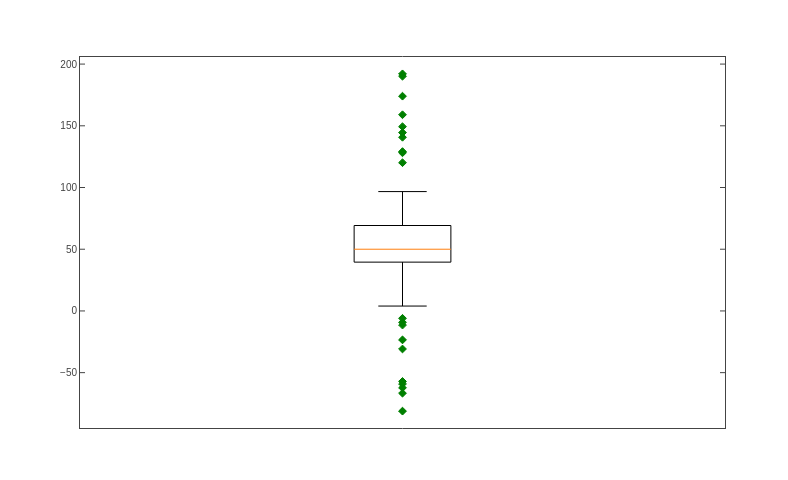

In [1]:
import plotly.offline as py
import plotly.tools as tls

import matplotlib.pyplot as plt
import numpy as np

spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low), 0)

# change outlier point symbols
mpl_fig = plt.figure()
plt.boxplot(data, 0, 'gD')

plotly_fig = tls.mpl_to_plotly(mpl_fig)
py.iplot(plotly_fig, filename='mpl-boxplot-outliers')